# Test live notebook

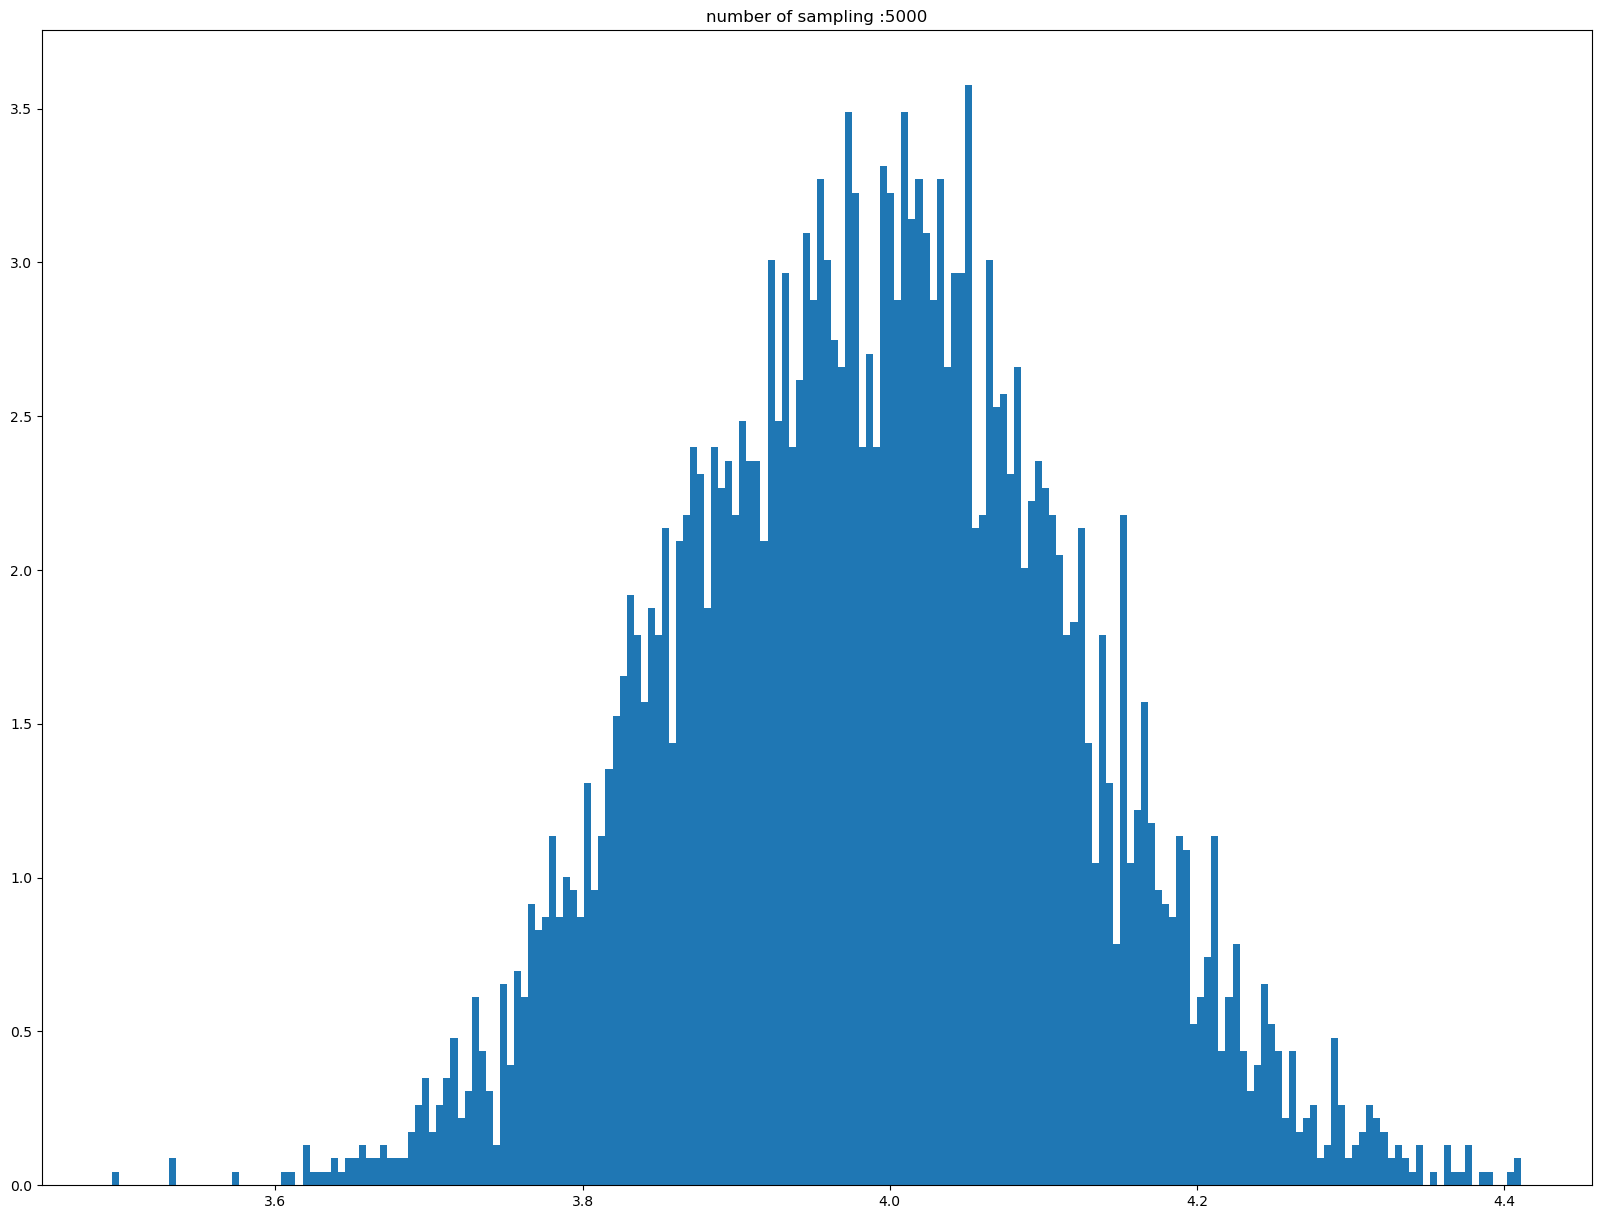

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1
# build gamma distribution as population
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 5000)

# Step 2
## sample from population with different number of sampling
# a list of sample mean
meansample = []
# number of sample
numofsample = [5000]
# sample size
samplesize = 500
# for each number of sampling 
for i in numofsample:
    # collect mean of each sample
    eachmeansample = []
    # for each sampling
    for j in range(0,i):
        # sampling 500 sample from population
        rc = random.choices(s, k=samplesize)
        # collect mean of each sample
        eachmeansample.append(sum(rc)/len(rc))
    # add mean of each sampling to the list
    meansample.append(eachmeansample)
   
# Step 3
# I will import the list above, so I make the code after this line run only when I call this file directly
if __name__ == "__main__":   
    # plot
    cols = 1
    rows = 1
    fig, ax = plt.subplots(rows, cols, figsize=(20,15))
    n = 0
    ax.hist(meansample[n], 200, density=True)
    ax.set_title(label="number of sampling :" + str(numofsample[n]))
    n += 1
    plt.show()

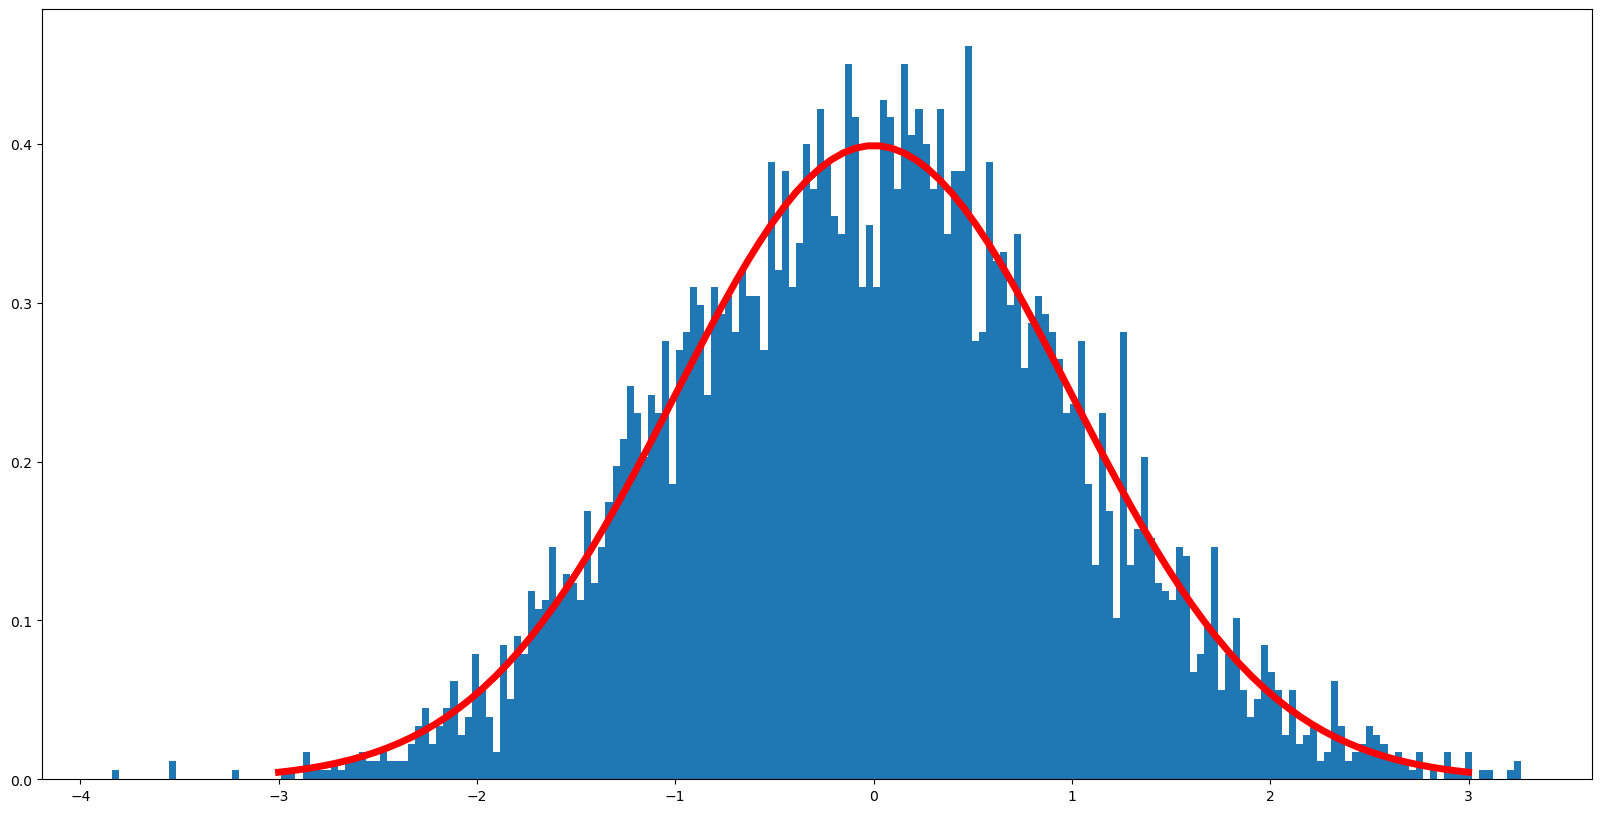

In [2]:

# Step 1
# use last sampling
sm = meansample[len(meansample)-1]

# Step 2
# calculate start deviation
std = np.std(sm)
# set population mean
mean = np.mean(sm)
# list of standarded sample

# Step 3
zn = []
# for each sample subtract with mean and devided by standard deviation
for i in sm:
    zn.append((i-mean)/std)
    
# Step 4
# plot hist
plt.figure(figsize=(20,10))
plt.hist(zn, 200, density=True)
# compare with standard normal disrtibution line
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# draw standard normal disrtibution line
plt.plot(x, stats.norm.pdf(x, mu, sigma),linewidth = 5, color='red')
plt.show()
